# Initial analysis of the stereofog dataset

In [2]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
from general_imports import *
from utils_stereofog import variance_of_laplacian

import cv2

In [3]:
dataset_path = 'datasets/stereofog_images'

In [4]:
variance_values = []
image_count = 0
subfolder = 'B'

for folder in [item for item in os.listdir(dataset_path) if item[0] != '.' and '.xlsx' not in item]:
    
    for image in [item for item in os.listdir(os.path.join(dataset_path, folder, subfolder)) if item[0] != '.']:

        image_count += 1
        image_path = os.path.join(dataset_path, folder, subfolder, image)
        image_gray = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
        variance_values.append(-variance_of_laplacian(image_gray))

print('Total images: {}'.format(image_count))
print('Mean variance: {}'.format(sum(variance_values) / len(variance_values)))

Total images: 7274
Mean variance: 20.493986244086287


In [5]:
variance_values_df = pd.Series(sorted(variance_values))

In [6]:
cutoff = 80

print('Removed values:', len(variance_values_df[variance_values_df > cutoff]) / len(variance_values_df)*100, '%')

Removed values: 2.9694803409403354 %


<Axes: >

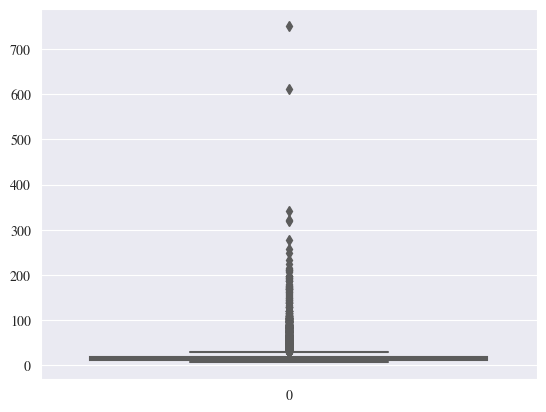

In [8]:
sns.boxplot(variance_values_df)

In [10]:
Q1 = np.percentile(variance_values_df, 25, method='midpoint')
Q3 = np.percentile(variance_values_df, 75, method='midpoint')
IQR = Q3 - Q1

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

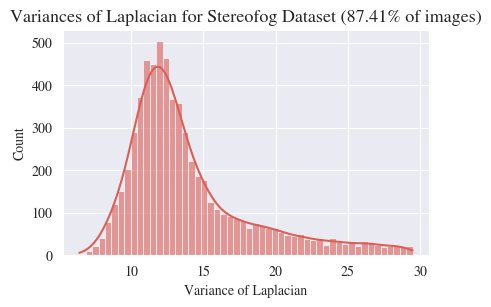

In [20]:
fig, ax = plt.subplots(figsize=set_size())

sns.histplot(variance_values_df[(variance_values_df < upper) & (variance_values_df > lower)], ax = ax, kde=True, fill=True, alpha=0.6)
ax.set_xlabel('Variance of Laplacian')
ax.set_ylabel('Count')

plt.savefig('plots/stereofog_dataset_variances.pdf', format='pdf', bbox_inches='tight')

ax.set_title(f'Variances of Laplacian for Stereofog Dataset ({len(variance_values_df[(variance_values_df < upper) & (variance_values_df > lower)]) / len(variance_values_df)*100:.2f}% of images)')
plt.show()